In [123]:
# Import necessary libraries
import pandas as pd
import numpy as np
from tensorflow import*
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout, MaxPooling1D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import mediapipe as mp
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

In [124]:
# Load the CSV file
df = pd.read_csv("C:\\Users\\komal\\OneDrive\\Desktop\\RAPID\\1stand2ndcombine.csv")

In [125]:
# Extract features and labels
X = df.iloc[:, 1:-1].values  # Keypoints columns
y = df.iloc[:, -1].values  # Labels column

In [126]:
# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Save label encoder classes
np.save('label_encoder_classes.npy', label_encoder.classes_)

In [127]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

In [128]:
# Reshape data to fit the CNN model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [129]:
# Define a more complex CNN model
from tensorflow.keras.layers import BatchNormalization

model = Sequential()
model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
# model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(128, kernel_size=3, activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(256, kernel_size=3, activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(512, kernel_size=3, activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

C:\Users\komal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [130]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [135]:
# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=150, batch_size=90, validation_data=(X_test, y_test), callbacks= early_stopping)

Epoch 1/150
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.8568 - loss: 0.6893 - val_accuracy: 0.8828 - val_loss: 0.6273
Epoch 2/150
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8592 - loss: 0.6775 - val_accuracy: 0.8732 - val_loss: 0.6169
Epoch 3/150
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8694 - loss: 0.6437 - val_accuracy: 0.8756 - val_loss: 0.6452
Epoch 4/150
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8508 - loss: 0.6956 - val_accuracy: 0.8684 - val_loss: 0.6386
Epoch 5/150
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.8666 - loss: 0.6762 - val_accuracy: 0.8684 - val_loss: 0.6054
Epoch 6/150
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8544 - loss: 0.6789 - val_accuracy: 0.8636 - val_loss: 0.6060
Epoch 7/150
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8638 - loss: 0.6518 - val_accuracy: 0.8708 - val_loss: 0.6515
Epoch 8/150
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8594 - loss: 0.6517 - val_accuracy: 0.

In [136]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8989 - loss: 0.5764
Test accuracy: 0.9019138813018799


In [137]:
# Save the model
model.save('sign_language_model_2.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted label: hear


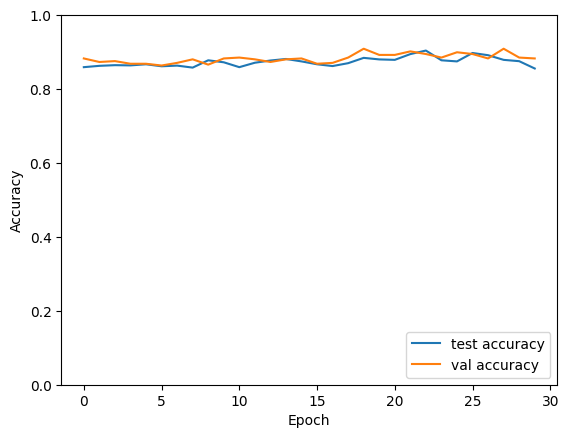

In [138]:
# Function to predict sign language word from keypoints
def predict_sign_language(keypoints):
    keypoints = np.array(keypoints).reshape(1, len(keypoints), 1)
    prediction = model.predict(keypoints)
    label_index = np.argmax(prediction)
    return label_encoder.inverse_transform([label_index])[0]

# Example prediction
example_keypoints = X_test[0].flatten()
predicted_label = predict_sign_language(example_keypoints)
print(f'Predicted label: {predicted_label}')

# Plot training history
plt.plot(history.history['accuracy'], label='test accuracy')
plt.plot(history.history['val_accuracy'], label = 'val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()